In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

In [2]:
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial' 
plt.rcParams['svg.fonttype'] = 'none'

In [3]:
## Paths
data_folder = "../data/"
figure_folder = "../figures/"

In [4]:
## Read data
HBE_data = pd.read_csv(data_folder+"GATA1_lib_HBE_2LP/activity_per_LP_summary.txt", sep="\t")
HBG_data = pd.read_csv(data_folder+"GATA1_lib_HBG_2LP/activity_per_LP_summary.txt", sep="\t")
GAPDH_data = pd.read_csv(data_folder+"GATA1_lib_GAPDH_2LP/activity_per_LP_summary.txt", sep="\t")

HBE_data["promoter"] = "HBE"
HBG_data["promoter"] = "HBG"
GAPDH_data["promoter"] = "GAPDH"
merged = pd.concat([HBE_data, HBG_data, GAPDH_data])


In [5]:
merged_wide = merged.pivot(index=["CRE", "flag", "group"], values=["norm_mean_exp_0kb", "norm_mean_exp_10kb", "fold_change"], columns="promoter").reset_index()
merged_wide.columns = merged_wide.columns.map('_'.join)
merged_wide = merged_wide.dropna().reset_index(drop=True)

In [6]:
merged_wide["HBG_10kb_rank"] = merged_wide["norm_mean_exp_10kb_HBG"].rank()
merged_wide["HBG_0kb_rank"] = merged_wide["norm_mean_exp_0kb_HBG"].rank()

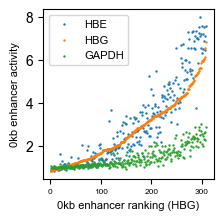

In [7]:
## Compare 0kb activity ranking across promoters
plt.figure(figsize=(2.2, 2.2))

sns.scatterplot(data=merged_wide, x = "HBG_0kb_rank", y="norm_mean_exp_0kb_HBE", s=3, linewidth=0)
sns.scatterplot(data=merged_wide, x = "HBG_0kb_rank", y="norm_mean_exp_0kb_HBG", s=3, linewidth=0)
sns.scatterplot(data=merged_wide, x = "HBG_0kb_rank", y="norm_mean_exp_0kb_GAPDH", s=3, linewidth=0)
plt.legend(labels=["HBE", "HBG", "GAPDH"], fontsize=8)
plt.xlabel("0kb enhancer ranking (HBG)", fontsize=8)
plt.ylabel("0kb enhancer activity", fontsize=8)
plt.xticks(fontsize=6)
plt.xticks(fontsize=6)
plt.savefig(figure_folder+"across_promoters_0kb_ranking.svg", dpi=300)

<Figure size 500x500 with 0 Axes>

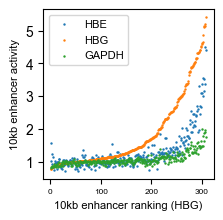

In [8]:
## Compare 10kb activity across promoters
plt.figure(figsize=(5,5))
plt.figure(figsize=(2.2, 2.2))

sns.scatterplot(data=merged_wide, x = "HBG_10kb_rank", y="norm_mean_exp_10kb_HBE", s=3, linewidth=0)
sns.scatterplot(data=merged_wide, x = "HBG_10kb_rank", y="norm_mean_exp_10kb_HBG", s=3, linewidth=0)
sns.scatterplot(data=merged_wide, x = "HBG_10kb_rank", y="norm_mean_exp_10kb_GAPDH", s=3, linewidth=0)
plt.legend(labels=["HBE", "HBG", "GAPDH"], fontsize=8)
plt.xlabel("10kb enhancer ranking (HBG)", fontsize=8)
plt.ylabel("10kb enhancer activity", fontsize=8)
plt.xticks(fontsize=6)
plt.xticks(fontsize=6)
plt.savefig(figure_folder+"across_promoters_10kb_ranking.svg", dpi=300)

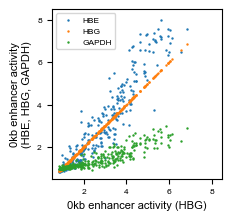

In [9]:
## Compare 0kb activity across promoters (Figure 4E)
plt.figure(figsize=(2.2, 2.2))

sns.scatterplot(data=merged_wide, x = "norm_mean_exp_0kb_HBG", y="norm_mean_exp_0kb_HBE", linewidth=0, s=3)
sns.scatterplot(data=merged_wide, x = "norm_mean_exp_0kb_HBG", y="norm_mean_exp_0kb_HBG", linewidth=0, s=3)
sns.scatterplot(data=merged_wide, x = "norm_mean_exp_0kb_HBG", y="norm_mean_exp_0kb_GAPDH", linewidth=0, s=3)
plt.legend(labels=["HBE", "HBG", "GAPDH"], fontsize=6, loc="upper left")
plt.xlabel("0kb enhancer activity (HBG)", fontsize=8)
plt.ylabel("0kb enhancer activity\n(HBE, HBG, GAPDH)", fontsize=8)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.xlim(0.5, 8.5)
plt.ylim(0.5, 8.5)
plt.savefig(figure_folder+"across_promoters_0kb_scatter.svg", dpi=300)

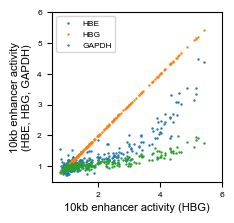

In [10]:
## Compare 10kb activity across promoters (Figure 4F)
plt.figure(figsize=(2.2, 2.2))

sns.scatterplot(data=merged_wide, x = "norm_mean_exp_10kb_HBG", y="norm_mean_exp_10kb_HBE", linewidth=0, s=3)
sns.scatterplot(data=merged_wide, x = "norm_mean_exp_10kb_HBG", y="norm_mean_exp_10kb_HBG", linewidth=0, s=3)
sns.scatterplot(data=merged_wide, x = "norm_mean_exp_10kb_HBG", y="norm_mean_exp_10kb_GAPDH", linewidth=0, s=3)
plt.legend(labels=["HBE", "HBG", "GAPDH"], fontsize=6, loc="upper left")
plt.xlabel("10kb enhancer activity (HBG)", fontsize=8)
plt.ylabel("10kb enhancer activity\n(HBE, HBG, GAPDH)", fontsize=8)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.xlim(0.5, 6)
plt.ylim(0.5, 6)
plt.savefig(figure_folder+"across_promoters_10kb_scatter.svg", dpi=300)

In [11]:
merged_wide_0kb = merged_wide[["CRE_", "group_", "norm_mean_exp_0kb_GAPDH", "norm_mean_exp_0kb_HBE", "norm_mean_exp_0kb_HBG"]]
merged_wide_0kb["HBG"] = merged_wide_0kb["norm_mean_exp_0kb_HBG"]
merged_wide_0kb.columns = ["CRE", "group", "GAPDH", "HBE", "HBG", "HBG_base"]
merged_long_0kb = pd.melt(merged_wide_0kb, id_vars=["CRE", "group", "HBG_base"], value_vars=["GAPDH", "HBE", "HBG"], var_name = "promoter", value_name = "norm_mean_exp")

/tmp/ipykernel_2199069/4228405759.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_wide_0kb["HBG"] = merged_wide_0kb["norm_mean_exp_0kb_HBG"]


In [12]:
merged_wide_10kb = merged_wide[["CRE_", "group_", "norm_mean_exp_10kb_GAPDH", "norm_mean_exp_10kb_HBE", "norm_mean_exp_10kb_HBG"]]
merged_wide_10kb["HBG"] = merged_wide_10kb["norm_mean_exp_10kb_HBG"]
merged_wide_10kb.columns = ["CRE", "group", "GAPDH", "HBE", "HBG", "HBG_base"]
merged_long_10kb = pd.melt(merged_wide_10kb, id_vars=["CRE", "group", "HBG_base"], value_vars=["GAPDH", "HBE", "HBG"], var_name = "promoter", value_name = "norm_mean_exp")

/tmp/ipykernel_2199069/218717457.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_wide_10kb["HBG"] = merged_wide_10kb["norm_mean_exp_10kb_HBG"]


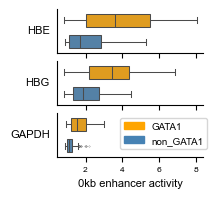

In [13]:
## 0kb induction across promoters (Figure 4B)
g = sns.catplot(
    kind="box", 
    data=merged_long_0kb[merged_long_0kb["group"].isin(["GATA1", "non_GATA1"])], 
    x="norm_mean_exp", 
    hue="group", 
    y="group", 
    row="promoter", 
    order=["GATA1", "non_GATA1"], 
    palette={"GATA1": "orange", "non_GATA1": "steelblue"}, 
    row_order=["HBE", "HBG", "GAPDH"], 
    orient="h", 
    height=0.8, 
    aspect=3.5,
    linewidth=0.75,
    dodge=False, 
    fliersize=0.2,
    width=0.6,
)

# Set labels and save
g.set(title=None,ylabel="", xlabel="0kb enhancer activity")

for ax, promoter in zip(g.axes.flatten(), ["HBE", "HBG", "GAPDH"]):
    ax.text(-0.05, 0.4, promoter, fontsize=8, ha="right", va="bottom",transform=ax.transAxes)
# Adjust tick font size (6pt) and label font size (8pt)
for ax in g.axes.flatten():
    ax.tick_params(axis="x", labelsize=6)
    ax.tick_params(axis="y", labelsize=6)
    ax.set_yticks([])
    ax.xaxis.label.set_size(8)
    ax.yaxis.label.set_size(8)
g.figure.subplots_adjust(hspace=0.2)

gata1_patch = mpatches.Patch(color="orange", label="GATA1")
non_gata1_patch = mpatches.Patch(color="steelblue", label="non_GATA1")

plt.legend(
    handles=[gata1_patch, non_gata1_patch],
    fontsize=7,
    loc="upper left",
    bbox_to_anchor=(0.4,1)
)


plt.savefig(figure_folder+"across_promoters_0kb.svg", dpi=300)

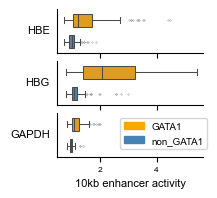

In [14]:
## 10kb induction across promoters (Figure 4C)
g = sns.catplot(
    kind="box", 
    data=merged_long_10kb[merged_long_10kb["group"].isin(["GATA1", "non_GATA1"])], 
    x="norm_mean_exp", 
    hue="group", 
    y="group", 
    row="promoter", 
    order=["GATA1", "non_GATA1"], 
    palette={"GATA1": "orange", "non_GATA1": "steelblue"}, 
    row_order=["HBE", "HBG", "GAPDH"], 
    orient="h", 
    height=0.8, 
    aspect=3.5,
    linewidth=0.75,
    dodge=False, 
    fliersize=0.2,
    width=0.6,
)

# Set labels and save
g.set(title=None,ylabel="", xlabel="10kb enhancer activity")

for ax, promoter in zip(g.axes.flatten(), ["HBE", "HBG", "GAPDH"]):
    ax.text(-0.05, 0.4, promoter, fontsize=8, ha="right", va="bottom",transform=ax.transAxes)
# Adjust tick font size (6pt) and label font size (8pt)
for ax in g.axes.flatten():
    ax.tick_params(axis="x", labelsize=6)
    ax.tick_params(axis="y", labelsize=6)
    ax.set_yticks([])
    ax.xaxis.label.set_size(8)
    ax.yaxis.label.set_size(8)
g.figure.subplots_adjust(hspace=0.2)

gata1_patch = mpatches.Patch(color="orange", label="GATA1")
non_gata1_patch = mpatches.Patch(color="steelblue", label="non_GATA1")

plt.legend(
    handles=[gata1_patch, non_gata1_patch],
    fontsize=7,
    loc="upper left",
    bbox_to_anchor=(0.4, 1)
)


plt.savefig(figure_folder+"across_promoters_10kb.svg", dpi=300)

/tmp/ipykernel_2199069/3390657455.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])


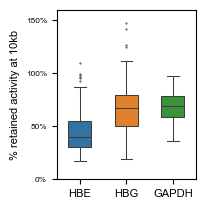

In [15]:
## Percentage retainded activity (Figure 4D)

plt.figure(figsize=(1.8,2.2))

## Only plot enhancers active at 0kb, use 95% quantile as threshold
threshold = merged[merged["group"] == "scrambled"]["norm_mean_exp_0kb"].quantile(0.95)

ax = sns.boxplot(merged[(merged["norm_mean_exp_0kb"] > threshold) ], x="promoter", hue="promoter", y="fold_change", width=0.5, legend=False, fliersize=0.5, linewidth=0.75)
plt.ylabel("% retained activity at 10kb", fontsize=8)
plt.xlabel("")
plt.xticks(fontsize=8)
plt.yticks(fontsize=6)
plt.ylim(0,1.6)
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])

plt.savefig(figure_folder+"percentage_retained_10kb_activity.svg", dpi=300)

In [16]:
print("% retained activity at 10kb for HBG:", merged[(merged["norm_mean_exp_0kb"] > threshold) & (merged["promoter"] == "HBG")]["fold_change"].mean())
print("% retained activity at 10kb for HBE:", merged[(merged["norm_mean_exp_0kb"] > threshold) & (merged["promoter"] == "HBE")]["fold_change"].mean())
print("% retained activity at 10kb for GAPDH:", merged[(merged["norm_mean_exp_0kb"] > threshold) & (merged["promoter"] == "GAPDH")]["fold_change"].mean())

% retained activity at 10kb for HBG: 0.6697858401290556
% retained activity at 10kb for HBE: 0.4503821057328034
% retained activity at 10kb for GAPDH: 0.6840797109079874
